# 最急降下法　スクラッチ

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('sample_data.csv')

<Axes: xlabel='space', ylabel='rent'>

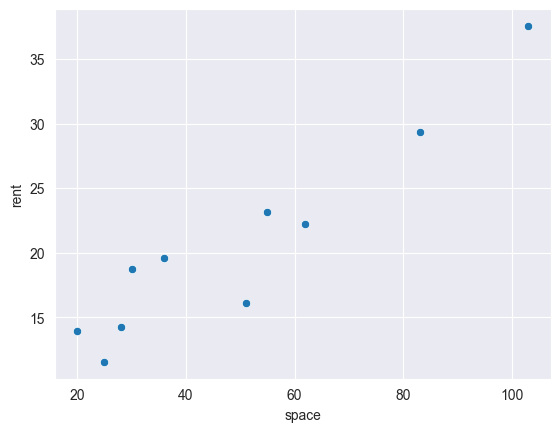

In [5]:
sns.scatterplot(x='space', y='rent', data=df)

## 損失関数定義　今回はMSE

In [7]:
df.head()

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674


In [9]:
x = df['space'].values
x

array([ 20,  25,  28,  30,  36,  51,  55,  62,  83, 103])

In [11]:
y = df['rent'].values
y

array([13.9588237 , 11.53380496, 14.26954729, 18.7226796 , 19.60267397,
       16.06816636, 23.18359859, 22.21259504, 29.35701011, 37.56512884])

In [66]:
def cost_func(theta_0, theta_1, x, y):
    return np.mean((y-(theta_0 + theta_1 * x))**2)

cost_func(2, 3, x, y)

21664.319648883382

## 損失関数の可視化

In [71]:
import matplotlib.pyplot as plt
from itertools import product

In [85]:

X = np.linspace(-20, 20, 300)
Y = np.linspace(-1, 1, 300)
theta_0, theta_1 = np.meshgrid(X,Y)
Z = [cost_func(param[0], param[1], x=x, y=y) for param in list(product(X, Y)) ]
Z = np.array(Z).reshape(300,300)


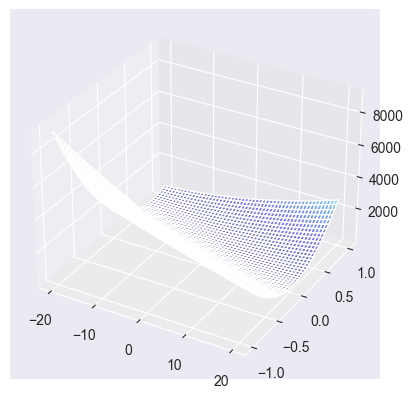

In [88]:
ax = plt.axes(projection='3d')
ax.plot_surface(X=theta_0.T, Y=theta_1.T, Z=Z, cmap='jet', alpha=0.5)

## 　最急降下法を実装してみよう

## 正規方程式をスクラッチ使用

In [105]:
X = np.vstack([np.ones(len(x)), x]).T

In [107]:
best_theta = np.linalg.inv(X.T @ X) @ X.T @ y

array([7.0962325 , 0.27487161])

In [101]:
X.reshape(2,10)

array([[ 20.        ,  25.        ,  28.        ,  30.        ,
         36.        ,  51.        ,  55.        ,  62.        ,
         83.        , 103.        ],
       [ 13.9588237 ,  11.53380496,  14.26954729,  18.7226796 ,
         19.60267397,  16.06816636,  23.18359859,  22.21259504,
         29.35701011,  37.56512884]])

In [100]:
X.shape

(20,)

## scikit-learnで線形回帰

In [108]:
from sklearn.linear_model import LinearRegression

In [119]:
model = LinearRegression()

### 目的変数をrent 説明変数をspace

Xは、行列もしくは、DateFrameでなければならない

In [120]:
x = df['space'].values
y = df['rent'].values
X = x.reshape(10, 1)

In [121]:
model.fit(X, y) #学習

LinearRegression()

In [123]:
model.predict(X) #予測の実行

array([12.59366469, 13.96802274, 14.79263756, 15.34238078, 16.99161044,
       21.11468458, 22.21417102, 24.13827229, 29.91057608, 35.40800827])

In [125]:
# coeffient 係数を見る
model.coef_

array([0.27487161])

In [126]:
# intercept 切片をみる
model.intercept_

7.0962324999088295

 # 特徴量スケーリング

In [127]:
# load data
df = pd.read_csv('sample_data2.csv')

In [129]:
X = df[['space', 'age']]

In [131]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [132]:
scaler.fit(X)

StandardScaler()

In [134]:
X_scaled = scaler.transform(X)

In [135]:
pd.DataFrame(X_scaled, columns=X.columns)

,space,age
0,-1.134662,-0.806277
1,-0.941034,0.633504
2,-0.824857,1.353394
3,-0.747405,0.201569
4,-0.515051,-0.374343
5,0.065834,-1.094233
6,0.220736,-0.518321
7,0.491816,-0.950255
8,1.305055,-0.518321
9,2.079569,2.073284


In [137]:
#　線形回帰
from sklearn.linear_model import LinearRegression as LR
model = LR()
y = df['rent']
model.fit(X_scaled, y)

LinearRegression()

## 正規化

In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [141]:
pd.DataFrame(X_scaled, columns=X.columns)

,space,age
0,0.000000,0.090909
1,0.060241,0.545455
2,0.096386,0.772727
3,0.120482,0.409091
4,0.192771,0.227273
5,0.373494,0.000000
6,0.421687,0.181818
7,0.506024,0.045455
8,0.759036,0.181818
9,1.000000,1.000000


In [142]:
# 次のようにfitとtransformをまとめることができる
scaler.fit_transform(X)

array([[0.        , 0.09090909],
       [0.06024096, 0.54545455],
       [0.09638554, 0.77272727],
       [0.12048193, 0.40909091],
       [0.19277108, 0.22727273],
       [0.37349398, 0.        ],
       [0.42168675, 0.18181818],
       [0.5060241 , 0.04545455],
       [0.75903614, 0.18181818],
       [1.        , 1.        ]])

## 線形回帰の係数の優位差の確認

## 線形回帰の解釈

## t検定

In [145]:
#データ準備
y_col = 'rent'
X = df.drop(columns=[y_col])
y = df[y_col]

In [149]:
#線形回帰
import  statsmodels.api as sma
X = sma.add_constant(X)
est = sma.OLS(y, X)
est_trained = est.fit()
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.66
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           0.000282
Time:                        23:01:09   Log-Likelihood:                -22.687
No. Observations:                  10   AIC:                             51.37
Df Residuals:                       7   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4150      2.043      3.140      0.0

/Users/ogawamaki/Desktop/kaggle/venv/venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [153]:
# 標準化
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=[y_col])
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = sma.add_constant(X_scaled)
est = sma.OLS(y, X_scaled)
est_trained = est.fit()
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.66
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           0.000282
Time:                        23:10:22   Log-Likelihood:                -22.687
No. Observations:                  10   AIC:                             51.37
Df Residuals:                       7   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6474      0.884     23.355      0.0

/Users/ogawamaki/Desktop/kaggle/venv/venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


 ## ダミー変数化